# Decision Tree VS Niave Bayes using the iris dataset

# Definitions

• dataset - The data to be used in training and testing a learning algorithm

• training - The process of grouping feature characteristics into categories

• testing - The process of checking if the trained algorithm is able to correctly categorize data it has never seen before 

• validation dataset - dataset that is used after training and testing to validate the correctness of the algorithm

• ground truth, label - a category attached to a set of features

• pre-processing -ensuring the data is in the correct structure to be accepted by the learning algorithm

• feature - distinguishing characteristic of a category

• numerical - using only numbers

• nominal - best for the situation

• decision surface - a surface that separates possible outcomes

• model validation - proving a model works as designed

• accuracy - how close to the correct solution something is

• cross-validation - training a model with different parts of the dataset on different iterations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.datasets
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

%matplotlib inline


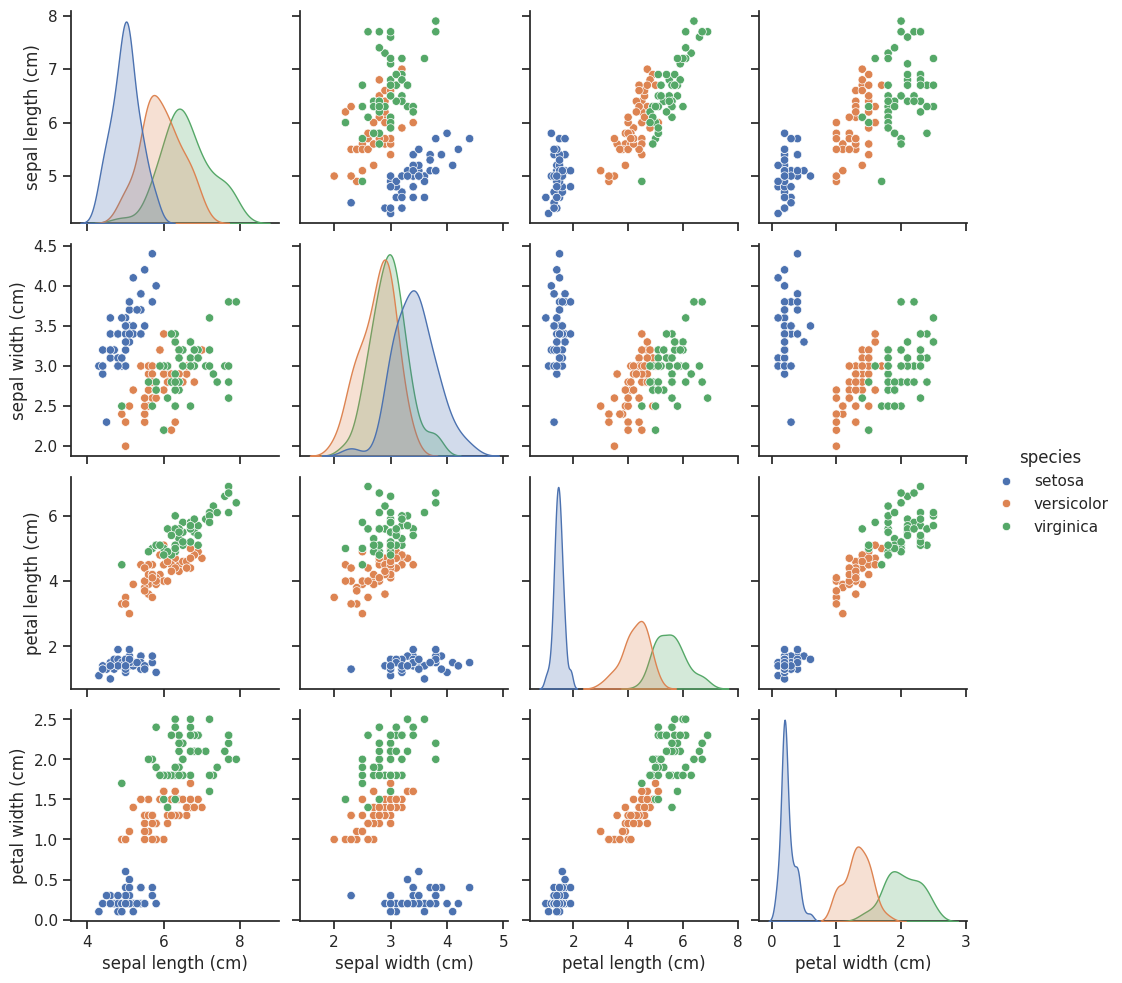

In [2]:
sns.set(style="ticks", color_codes=True)

iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(
    data=np.c_[iris.data, [iris.target_names[v] for v in iris.target]],
    columns=iris.feature_names + ["species"],
)
cols = iris_df.columns.drop("species")
iris_df[cols] = iris_df[cols].apply(pd.to_numeric)
g = sns.pairplot(iris_df, hue="species")

Based on the graphs, petal length or petal width vs any of the other features provides pretty good separation between the clusters. There is always a little bit of overlap between versicolor and virginica but that seems to be minimized in the graph of petal length vs petal width. 

Most of the plots have three obvious clusters, except sepal length vs sepal width. It appears to only have 2 distinct clusters because there is so much overlap between versicolor and virginica. 

I don't really see a graph that obviously has 4 clusters but sepal length vs petal width can be separated into 4 clusters as shown below.

There still exists a relationship between classification and clustering because this data shows a clear separation between different species. This allows an unknown species to be tested against this known sample set and be classified based on which cluster it most closely belongs to. 

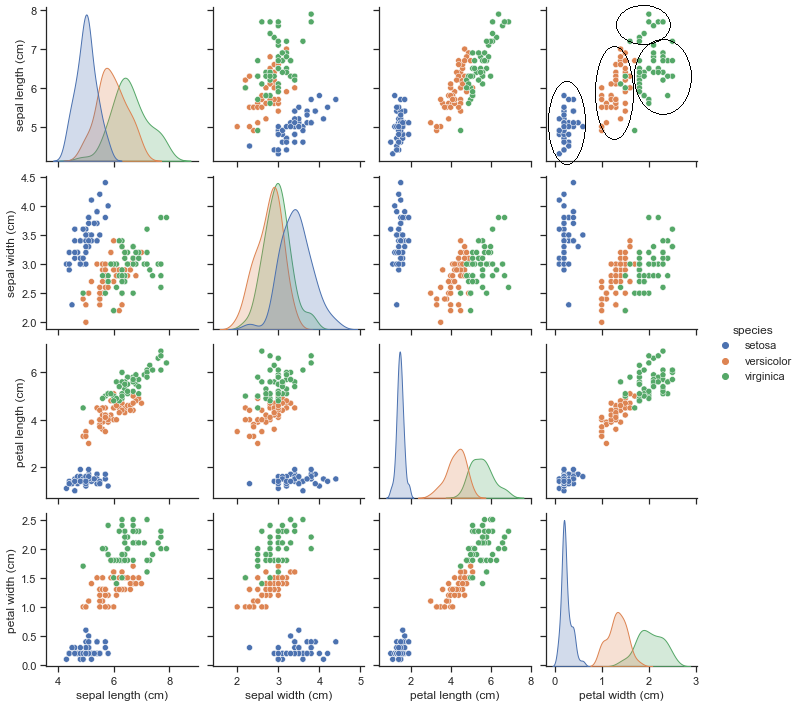

The decision tree seems to outperform the Naive Bayes approach slightly as the population of data in the training set increases. With a small population of training data, the Naive Bayes seems to perform better than the decision tree. Both approaches eventually plateau around 1 or 0 mistakes. It's difficult to determine the performance of each approach when the training data is a large portion of the overall dataset since there aren't many examples to test against. 

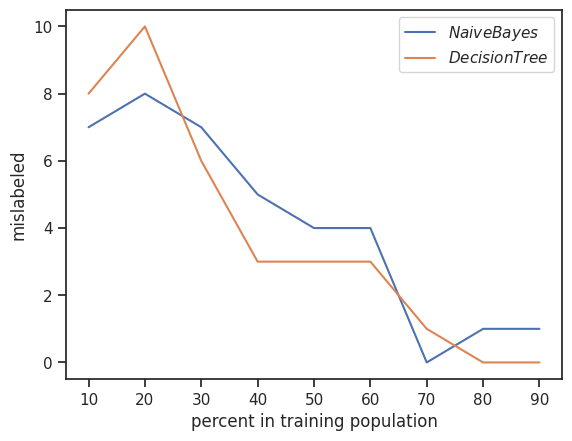

In [3]:
x = [90, 80, 70, 60, 50, 40, 30, 20, 10]
y1 = [1, 1, 0, 4, 4, 5, 7, 8, 7]
y2 = [0, 0, 1, 3, 3, 3, 6, 10, 8]
plt.plot(x, y1, label="$Naive Bayes$")
plt.plot(x, y2, label="$Decision Tree$")
plt.legend()
plt.xlabel("percent in training population")
plt.ylabel("mislabeled")
plt.show()

In [4]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()
clf = tree.DecisionTreeClassifier()

# Learn the digits on the first half of the digits - 50% data is used as the training set
gnb.fit(X_train, y_train)
clf.fit(X_train, y_train)

# Predict the value of the digit on the second half
predicted_gnb = gnb.predict(X_test)
predicted_tree = clf.predict(X_test)

print(
    "Number of mislabeled points for Naive Bayes out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_gnb).sum())
)
print(
    "Number of mislabeled points for Decision Tree out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_tree).sum())
)

Number of mislabeled points for Naive Bayes out of a total 75 points : 4
Number of mislabeled points for Decision Tree out of a total 75 points : 3


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

gnb = GaussianNB()
clf = tree.DecisionTreeClassifier()

# Learn the digits on the first half of the digits - 40% data is used as the training set
gnb.fit(X_train, y_train)
clf.fit(X_train, y_train)

# Predict the value of the digit on the second half
predicted_gnb = gnb.predict(X_test)
predicted_tree = clf.predict(X_test)

print(
    "Number of mislabeled points for Naive Bayes out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_gnb).sum())
)
print(
    "Number of mislabeled points for Decision Tree out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_tree).sum())
)

Number of mislabeled points for Naive Bayes out of a total 90 points : 5
Number of mislabeled points for Decision Tree out of a total 90 points : 3


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

gnb = GaussianNB()
clf = tree.DecisionTreeClassifier()

# Learn the digits on the first half of the digits - 30% data is used as the training set
gnb.fit(X_train, y_train)
clf.fit(X_train, y_train)

# Predict the value of the digit on the second half
predicted_gnb = gnb.predict(X_test)
predicted_tree = clf.predict(X_test)

print(
    "Number of mislabeled points for Naive Bayes out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_gnb).sum())
)
print(
    "Number of mislabeled points for Decision Tree out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_tree).sum())
)

Number of mislabeled points for Naive Bayes out of a total 105 points : 7
Number of mislabeled points for Decision Tree out of a total 105 points : 5


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

gnb = GaussianNB()
clf = tree.DecisionTreeClassifier()

# Learn the digits on the first half of the digits - 20% data is used as the training set
gnb.fit(X_train, y_train)
clf.fit(X_train, y_train)

# Predict the value of the digit on the second half
predicted_gnb = gnb.predict(X_test)
predicted_tree = clf.predict(X_test)

print(
    "Number of mislabeled points for Naive Bayes out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_gnb).sum())
)
print(
    "Number of mislabeled points for Decision Tree out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_tree).sum())
)

Number of mislabeled points for Naive Bayes out of a total 120 points : 8
Number of mislabeled points for Decision Tree out of a total 120 points : 10


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

gnb = GaussianNB()
clf = tree.DecisionTreeClassifier()

# Learn the digits on the first half of the digits - 10% data is used as the training set
gnb.fit(X_train, y_train)
clf.fit(X_train, y_train)

# Predict the value of the digit on the second half
predicted_gnb = gnb.predict(X_test)
predicted_tree = clf.predict(X_test)

print(
    "Number of mislabeled points for Naive Bayes out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_gnb).sum())
)
print(
    "Number of mislabeled points for Decision Tree out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_tree).sum())
)

Number of mislabeled points for Naive Bayes out of a total 135 points : 7
Number of mislabeled points for Decision Tree out of a total 135 points : 8


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

gnb = GaussianNB()
clf = tree.DecisionTreeClassifier()

# Learn the digits on the first half of the digits - 60% data is used as the training set
gnb.fit(X_train, y_train)
clf.fit(X_train, y_train)

# Predict the value of the digit on the second half
predicted_gnb = gnb.predict(X_test)
predicted_tree = clf.predict(X_test)

print(
    "Number of mislabeled points for Naive Bayes out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_gnb).sum())
)
print(
    "Number of mislabeled points for Decision Tree out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_tree).sum())
)

Number of mislabeled points for Naive Bayes out of a total 60 points : 4
Number of mislabeled points for Decision Tree out of a total 60 points : 3


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

gnb = GaussianNB()
clf = tree.DecisionTreeClassifier()

# Learn the digits on the first half of the digits - 70% data is used as the training set
gnb.fit(X_train, y_train)
clf.fit(X_train, y_train)

# Predict the value of the digit on the second half
predicted_gnb = gnb.predict(X_test)
predicted_tree = clf.predict(X_test)

print(
    "Number of mislabeled points for Naive Bayes out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_gnb).sum())
)
print(
    "Number of mislabeled points for Decision Tree out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_tree).sum())
)

Number of mislabeled points for Naive Bayes out of a total 45 points : 0
Number of mislabeled points for Decision Tree out of a total 45 points : 1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gnb = GaussianNB()
clf = tree.DecisionTreeClassifier()

# Learn the digits on the first half of the digits - 80% data is used as the training set
gnb.fit(X_train, y_train)
clf.fit(X_train, y_train)

# Predict the value of the digit on the second half
predicted_gnb = gnb.predict(X_test)
predicted_tree = clf.predict(X_test)

print(
    "Number of mislabeled points for Naive Bayes out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_gnb).sum())
)
print(
    "Number of mislabeled points for Decision Tree out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_tree).sum())
)

Number of mislabeled points for Naive Bayes out of a total 30 points : 1
Number of mislabeled points for Decision Tree out of a total 30 points : 0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

gnb = GaussianNB()
clf = tree.DecisionTreeClassifier()

# Learn the digits on the first half of the digits - 90% data is used as the training set
gnb.fit(X_train, y_train)
clf.fit(X_train, y_train)

# Predict the value of the digit on the second half
predicted_gnb = gnb.predict(X_test)
predicted_tree = clf.predict(X_test)

print(
    "Number of mislabeled points for Naive Bayes out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_gnb).sum())
)
print(
    "Number of mislabeled points for Decision Tree out of a total %d points : %d"
    % (X_test.shape[0], (y_test != predicted_tree).sum())
)

Number of mislabeled points for Naive Bayes out of a total 15 points : 1
Number of mislabeled points for Decision Tree out of a total 15 points : 0
